# Bird Simulation Evaluation Script

## Imports & Preparations

In [1]:
import numpy as np
import birds
import argparse
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.animation import FuncAnimation
from matplotlib.collections import PathCollection
from IPython.display import HTML
from scipy.optimize import curve_fit
%matplotlib inline

## Run with these Settings

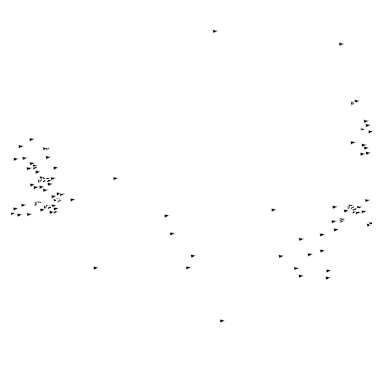

In [2]:
frames = 1000
birds.param_record = False
birds.trace = None
birds.flock = birds.Flock()
fig = plt.figure(figsize=(5, 5*birds.flock.args['height']/birds.flock.args['width']), facecolor="white")
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], aspect=1, frameon=False)
birds.collection = birds.MarkerCollection(birds.flock.args['n'])
ax.add_collection(birds.collection._collection)
ax.set_xlim(0, birds.flock.args['width'])
ax.set_ylim(0, birds.flock.args['height'])
ax.set_xticks([])
ax.set_yticks([])

animation = FuncAnimation(fig, birds.update, interval=10, frames=frames)
HTML(animation.to_html5_video())


## Find moving phase

## Run with varying Eta

[ 0.38396753 -0.00501288]


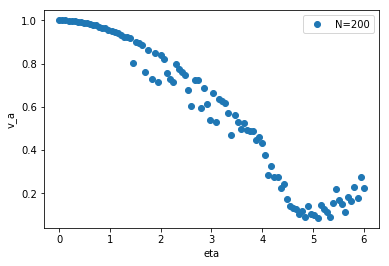

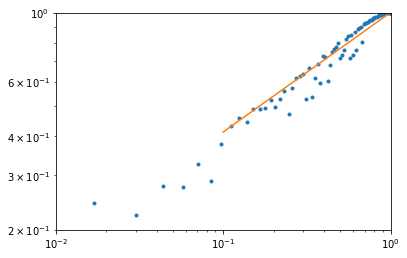

In [2]:
res = 100
time = range(500)
repeat = 5
rho=4
Eta = np.linspace(0.,6.,res)
N = [200]
#N = [40,100,400,4000,10000]

va = np.zeros((len(N),res))
vas = np.zeros(repeat)
for c,n in enumerate(N):
    for i,eta in enumerate(Eta):
        for j in range(repeat):
            f = birds.Flock(n=n,eta=eta,rho=rho)
            for t in time:
                f.run()
            vas[j] = f.get_va()
        va[c][i] = vas.sum()/repeat
        
for c,n in enumerate(N):
    plt.plot(Eta,va[c],'o',label="N="+str(n))
plt.xlabel("eta")
plt.ylabel("v_a")
plt.legend()
#plt.title("$v_a$ over $\\eta$ at L="+str(np.sqrt(n/rho)))


plt.figure()
plt.ylim(ymin=0.2)
plt.xlim(xmin=0.01)
eta_c = 4.5
for c,n in enumerate(N):
    plt.plot( (eta_c-Eta)/eta_c, va[c],'.',label="N="+str(n))
ca = plt.gca()
ca.set_xscale('log')
ca.set_yscale('log')

x = (eta_c-Eta)/eta_c
select = x > 0
x = np.log10(x[select])
y = np.log10(va[-1][select])
coef = np.polyfit(x,y,1)
print(coef)
plt.plot(np.logspace(-1,0,10), np.logspace(-1,0,10)**coef[0])

## Run with varying density

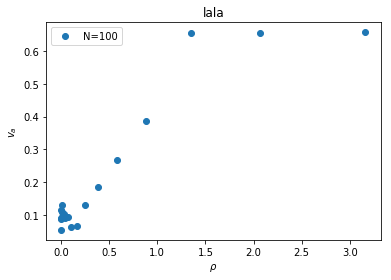

In [57]:
res = 20
time = range(1000)
repeat = 5
eta = 3
Rho = np.logspace(-3,0.5, res)
N = [100]

va = np.zeros((len(N), res))
vas = np.zeros(repeat)
for c,n in enumerate(N):
    for i,rho in enumerate(Rho):
        for j in range(repeat):
            f = birds.Flock(n=n, eta=eta, rho=rho)
            for t in time:
                f.run()
            vas[j] = f.get_va()
        va[c][i] = vas.sum()/repeat
        
for c,n in enumerate(N):
    plt.plot(Rho,va[c],'o',label="N="+str(n))

plt.xlabel("$\\rho$")
plt.ylabel("$v_a$")
plt.legend()
plt.title("lala")

## Run with varying angle

This has to be done for low rho and eta. This should be evident from the graphs above as a high value of eta reduces the alignment going to almost zero.

A high density causes more alignment, and thus if we attempt running with higher densities, they all align anyway.

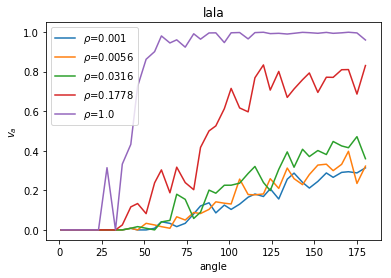

In [33]:
res = 40
time = range(500)
repeat = 3
eta = 0.1 # Again small
Angle = np.linspace(1,180,res,dtype=int)
Rho=np.logspace(-3, 0, 5)
n = 40

va = np.zeros((len(Rho), res))
vas = np.zeros(repeat)
for c,rho in enumerate(Rho):
    for i,angle in enumerate(Angle):
        for j in range(repeat):
            f = birds.Flock(n=n, eta=eta, rho=rho, angle=angle)
            for t in time:
                f.run()
            vas[j] = f.get_va()
        va[c][i] = vas.sum()/repeat
        
for c,rho in enumerate(Rho):
    plt.plot(Angle,va[c],label="$\\rho$="+str(np.round(rho,decimals=4)))
plt.xlabel("angle")
plt.ylabel("$v_a$")
plt.legend()
plt.title("lala")